### &#9989; CMSE 801 Final Project - Implementing Machine Learning for Particle Identification
### &#9989; Twymun K. Safford
#### &#9989; Project Due Date: 12/3/2019

# ___Implementing Machine Learning for Particle Identification___

## Background and Motivation

### What is Machine Learning?

There has been much buzz about implementing modern machine learning algorithms. The self-driving cars being unveiled by Google and Uber? That implements machine learning. The online recommendations you get from YouTube, Amazon, Google, and Netflix based on your activity behavior and choices? That also uses machine learning. How do companies know how to target ads towards you on social media such as Facebook and Twitter? That utilizes machine learning as well. How do banks and credit card companies catch fraudulent activity on one particular account with billions of other accounts that could have been targeted? That also implements machine learning! However, the question becomes - what is machine learning? Particularly, what are neural networks in regards to machine learning? Let's start with a bit of a brief interaction in the form of an informal video. This video does not go over all of the details (which will be described in depth later). Let's watch the video[<sup>1</sup>](#fn1) below to find out more! 

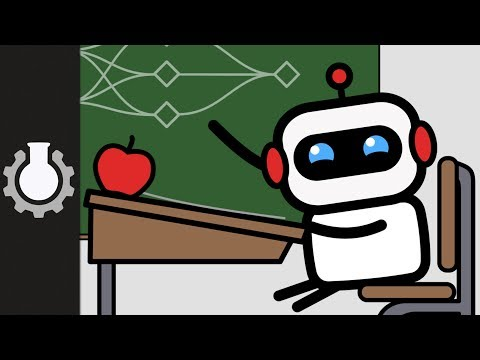

In [2]:
from IPython.display import YouTubeVideo #we need this to display YouTube libraries
# Youtube video - machine learning
YouTubeVideo("R9OHn5ZF4Uo",width=640,height=360)  # Writing functions

_Courtesy of CGP Grey from his YouTube video:_ __"How Machines Learn"__, copyright Dec 18, 2017

Machine learning is based on the idea that systems can learn from data, identify patterns and make decisions with minimal human intervention - drawing inspiration from how the visual cortex of various organic species by inspection can observe, inspect, analyze, and connect those observations via memory to identifying specific situations and objects. Once organisms have been introduced visually to what characteristics to associate with an object or with a concept, how much variability (or lack thereof) there are with said characteristics, taking in new information, and processing this information, organisms can then reevaluate and update the prior "dictionaries" associated with that object. For example, consider the image[<sup>2</sup>](#fn2) below:

![Dogs](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Collage_of_Nine_Dogs.jpg/390px-Collage_of_Nine_Dogs.jpg)

_Courtesy of Wikipedia:_ __"Dog - Wikipedia"__

From personal experience - either through reading, through media, and/or befriending one of these creatures, we as humans have to come to identify these creatures as "dogs" (without getting too much into linguistics). But, what characteristics do we associate with dogs? According to the image above, dogs can exhibit varying sizes, fur thickness, coat color, iris color, etc. Let's start with this approach. How many officially recognized dog breeds are there? Depending on which source[<sup>3</sup>](#fn3) you asked:

* The American Kennel Club recognizes 202 dog breeds
* The Kennel Club recognizes 211 dog breeds
* The Fédération Cynologique Internationale currently recognizes 344 breeds officially 

We will forego the nuance of what criteria each organization considers for a dog breed to be officially recognized, but this is a nice exercise to demonstrate how nuanced the characteristics that can be used to identify what a dog is if every characteristic of a breed is taken into consideration to the exclusion of other characteristics of different breeds. Let's start with some criteria. Some basic criteria that would satisfy what we consider a dog would be:

* Species identification - Dogs belong to Canis lupus familiaris as a wolf subspecies or Canis familiaris when considered a distinct species
* Domestication - dogs were specifically bred for domestication as pets, for labor, for hunting, for security, etc.
* Diet - dogs are predators and scavengers - subsisting on meat and whatever available but palatable food resources there are
* Heightened senses
* Manuverability - dogs generally walk about on all four limbs
* Coats - dogs are covered in fur (depending on breed) over the entirety of their bodies
* Tails - like their wolf brethren, dogs have tails..

This list can extend _ad infinitum_ if permitted, but this does convey the idea that we have established a taxonomy for how we classify dogs and how we may update or adjust that taxonomy based on whether or not the creature we observe meets the above criteria, and we may even have to adjust our taxonomy if we left out a prevalent characteristic to ensure we become more accurate in identifying what is a dog and what is not. We may even have a distinction on those taxonomies - for example, the difference between an organic dog as opposed to a robot built to resemble one. But, how does this process work and how can we relate that to machine learning? Let's consider the visual structure of the human brain.

![Eyes](https://miro.medium.com/max/640/1*gZlWB3GG9EtRV0knID7tfw.png)

_Courtesy of Greg Surma, Towards Data Science:_ __"Image Classifier - Cats vs. Dogs: Leveraging Convolutional Neural Networks (CNNs) and Google Colab’s Free GPU"__

It can be rather decpetive to rely intuitively on how we process the world around us visually. However, the neurons (an important concept which we will touch upon later) within the human brain are numerous and complexly-interwoven with so many connections that is a significantly more complicated than we would like to envision. 

In each hemisphere of our brain, humans have a primary visual cortex, also known as V1, which contains 140 million neurons - with tens of billions of connections between each of them. Adding to these complexities, there are entire series of visual cortices - V2, V3, V4, and V5 - each doing progressively more complex image processing.[<sup>4</sup>](#fn4) Identifying what makes a dog a dog or the difference between the number '3' and the number '8' seems easy because we are astoundingly proficient at interpreting visual information unconsciously. 

However, this unconscious bias becomes more recognizable for anyone attempting to get a computer program to recognize an image let alone follow a simple directive pending on whether the coding instructions given by the programmer are recognizable. The simple intuition between how the number '3' does have rounded edges but don't interlock versus the number '8' which some would describe simply as two circles stacked on top of each other. Expressing this algorithmically to a machine is a challenging task - especially if you may have a large collection of images containing numerical digits to be processed. The complexity of precise rules works for, say, ten individual numbers. However, what if we are given ten _million_ numbers to pass to our computer to sort through and identify? You can get lost in so many excpetions (what if someone, for example, injects artistic style into how they write the number '8', the number is imposed on varying background colors, it's upside down, it's barely legible, etc.). Again, the above examples were for one number. There are ten digits in the decimal system, so we would have significant issues if our algorithm was inaccurate at determining the difference between a '6' and a '8'. If _only_ we could get our computer to learn how to do these tasks for us - freeing us up for tasks of maybe managing the computer as it ran the algorithm, taking in more data, or even something as mundane as freeing up an hour for a nice brunch. A reflection upon how computer vision works will lead towards a solution.

In the realm of computer vision, tasks that computers can be programme dto do include methods for acquiring, processing, analyzing and understanding digital images, extracting high-dimensional data from those images (such as the RGB values corresponding to all or particular pixels), extracting data from the real world in order to produce numerical or symbolic information, and ultimately the goal if permitted to make decisions based on this information.[<sup>4</sup>](#fn4)Contemporary examples include:

* Object recognition – the capacity to recognize predefined or new images based on functions. This is usually together with their 2D positions in the image or 3D poses in the scene.

* Facial recognition - such as what Facebook uses to identify the facial structure of its users and to implement that recognition technology to future photos the user may upload or may be tagged in. 

* Image acquisition - A digital image is produced by image sensors, tomography devices, radar, ultrasonic cameras, electrical signals, etc. From the signals and data generated by these devices, images can be constructed or reconstructed as two-dimensional or three-dimensional images. Let's consider a simple example. 

What if you want to get a computer to recognize an image and reveal useful information about that image? What would you do to accomplish that? First, let's consider as previously mentioned how the vision system of the computer would break down information about each individual pixel based on their RGB values. Let's consider the image below as a bit of a visualization of this process.


![Colors](https://www.researchgate.net/profile/Max_Mignotte/publication/5462957/figure/fig4/AS:667037152075777@1536045458697/Estimation-for-each-pixel-x-of-the-N-q-bins-descriptor-q-5-in-the-RGB-color.jpg)

_Courtesy of Max Mignotte_ __"Segmentation by Fusion of Histogram-Based K -Means Clusters in Different Color Spaces, IEEE Transactions on Image Processing 17(5):780-7, June 2008"__

### Introduction - Artificial Neural Networks

Watch the video here for the abbreviated version of how neural networks work! For the theory and mathematics, continue below!

In [1]:
# Youtube video - machine learning
YouTubeVideo("aircAruvnKk",width=640,height=360)  # Writing functions

NameError: name 'YouTubeVideo' is not defined

_Courtesy of 3Blue1Brown from his YouTube video:_ __"But what is a Neural Network? | Deep learning, chapter 1"__, copyright Oct 5, 2017

For a computer, an image is a 3-dimensional (RGB) matrix of pixel values based around red, green, and blue. This seems less intuitive than how organisms process visual information, but knowing this can create a bridge between teaching a computer to interpret an algorithm to recognize and analyze images and data in a manner similar to humans. The type of artificial intelligence that can be implemented for this task is known as an __artificial neural network__, or just __neural network__ for short. 


Artificial neural networks are inspired by how the nervous systems of organisms process information. This inspired by the way biological neural systems process data[<sup>5</sup>](#fn5). Implementation is based on modeling the human brain - a neural net consists of thousands or even millions of simple processing nodes that are densely interconnected. An individual node (normally utilized in the feed forward network) for example, might be connected to several nodes in a data layer adjacent to it or below it from which it grabs data, while a node above it or adjacent to it in a higher hierarchy would sense data from that node. 


#### Perceptrons

Before we get into the linear algebra involved with neural networks, it is important to reference what is known as a _perceptron_. Perceptrons were developed in the 1950s and 1960s by several scientists[<sup>6</sup>](#fn6), but a perceptron takes several binary inputs such as $x_{1}$,$x_{2}$,…, and produces a single binary output as demonstrated below:

![Perceptron](http://neuralnetworksanddeeplearning.com/images/tikz0.png)

_Courtesy of Michael Nielsen_ __"Neural Networks and Deep Learning, Chapter 1, June 2019"__

With this perceptron, we can consider implementing what is known as weights - $w_{1}$,$w_{2}$,.., and so on. These are real numbers expressing the importance or priority of respective input neurons to that output neurons. Whether the output of this neuron results in 1 or 0 depends on whether or not the weighted sum is less than some threshold value. Accordingly, this is written as and succinctly expressed as:

$$Output =
  \begin{cases}
    \sum\limits_{j} w_{j} x_{j}      & \quad \leq \text{threshold}\\
    \sum\limits_{j} w_{j} x_{j} & \quad \geq \text{threshold}
  \end{cases}
$$

Let's consider an example similar to a "Butterfly Effect". Let's say for instance you wanted to plan out how a day in the middle of July would go. You assign a certain weight to the weather (it it's sunny, it is a good day to go the beach, and if rainy, stay indoors and plan a Netflix marathon), assign a weight for the number of friends to accompany you for each activity, the number of hours spent doing what activity, etc.  

We can assign as a short example the weight of '1' for your activity choice if the weather is sunny and '0' if the weather is rainy. For the other inputs, you could potentially assign weights higher than 1 (i.e., if it is sunny, you could assign a weight of 10 for the 'friends' input for a more public outing while assigning a weight of '5' for a more secluded activity if it is rainy and living space is not as large). So on and so forth until you reach a final 'output' you decide to codify with whether or not you and everyone invited enjoyed the outing. 

A single perceptron will not model the complexities of activities and interactions. Howeever, when several perceptrons are utilized in a way where the inputs and outputs of a perceptron, we get:

![PerceptronLinking](http://neuralnetworksanddeeplearning.com/images/tikz1.png)

_Courtesy of Michael Nielsen_ __"Neural Networks and Deep Learning, Chapter 1, June 2019"__

The first column of perceptrons execute more simple decisions while the second column onwards initiates more complex interactions and decisions until a final output is generated. This lays the groundwork for how we can now describe neurons mathematically.

#### Neurons

Suppose with a network of perceptrons in hand that we'd like to solve some problem (maybe we are training an algorithm to model a YouTube recommendation algorithm). Defined goals include a network to learn weights and biases so that the output from the network correctly classifies the digit. For self-ensurance that the learning algorithm is working some  incremental chances in the weight (or bias) in the network can be made. A small enough weight change should correspond to a small enough change in the performance of this network. 

However, there is an inherent problem if we are only implementing perceptrons. As mentioned previously, perceptrons have an output of '1' or '0' based on whether or not that weighted sum is less than the threshold condition - or if that condition is met at all! Changing the weight of that perceptron may cause its output to flip to zero! 

Consider the prior example. Let's say we incremently change the number of friends invited over for each activity choice (changing the weight) if you wanted to determine how each activity turned out. Incrementally changing the weight for the day at the beach from ten friends to nine friends might cause the final output perceptron or the perceptron linked with that final output associated with that activity to flip to 'zero' which depending on your model would make difficult to gauge whether the beach excursion was a success since now the rest of the model becomes harder to constrain and analyze.

This is where the more modern and more well-known method of implementing _neurons_ comes into play. Neurons are almost identifical to perceptrons - however, unlike perceptrons which only have binary arguments of '0' and '1', neurons can take values between 0 and 1 (more probabilistic). Like the perceptron, the neuron also has weights - $w_{1}$,$w_{2}$,.., and a bias defined as 'b'. However, the output of each neuron will be based on:



$$\sigma(w \cdot x + b)$$

In this case, $\sigma$ is defined as the sigmoid function (or logistic function as well) which can be defined as[<sup>7</sup>](#fn7):

$$\sigma(z) \equiv \frac{1}{1+e^{-z}} \equiv \frac{1}{1+exp(-\sum\limits_{j} w_{j} x_{j})}$$

In other words, when $z=w \cdot x + b$ is large and positive, the output from the sigmoid neuron is approximately 1, just as it would have been for a perceptron. Suppose on the other hand that $z=w \cdot x + b$ is very negative. In this case, then, the exponential term approaches infinity and thus the logistic function is zero. Algebraically, this implies that the logistic function is a smooth spline as opposed to a step function (reflecting the range of values a neuron can take).

This smoothness yields great opportunity! Since the logistic function is smooth, that means variations on the weight and bias will produce the noticeably small change in the output from that neuron. This change in the output can be approximated by:

$$\Delta Output \approx \sum \limits_{j} \frac {\delta output}{\delta w_{j}} \Delta w_{j} + \frac {\delta output}{\delta b} \Delta b$$

This sum is over all the weights.[<sup>8</sup>](#fn8) 

### The Science of Neutrinos

![Kamioka Observatory](https://cdn.journals.aps.org/journals/PHYSICS/synopses/images/10.1103/PhysRevLett.121.171802)

_Courtesy of Kamioka Observatory, ICRR (Institute for Cosmic Ray Research), University of Tokyo__

Let's take a break from the logistical aspects of neural networks to focus more on the subatomic particles known as _neutrinos_. We won't be reciting an entire textbook's worth of information and theory on them, but I find it helpful to cover some background on them in addition to collaborations that study them since one of the growing implementations for machine learning is within particle physics.

The neutrino (formally denoted within particle interactions as $\nu$) is a subatomic particle known as a fermion (in physics, a fermion is a particle with spin of half-integer). Neutrinos are unique amongst particles in the sense that they are electrically neutral, only interact via the weak subatomic force (the mechanism of interaction between subatomic particles that leads to the decay of atoms), and has an extremely tiny rest mass relative to even electrons.[<sup>9</sup>](#fn9) For reference, current measurements on the upper levels of the rest mass of the neutrino place it at less than 0.120 eV / ${c^2}$. The rest mass of an electron is 0.511 MeV, or $5.11 \cdot {10^5}$ eV / ${c^2}$. Adding to their ambiguity and elusiveness, neutrinos have a tremendously small cross section for interactions - approximately between $10^{-49}$ to $10^{-43}$ $m^2$ depending on what type of scattering event is being exhibited. Since neutrinos only interact via the weak force, the following processes will produce neutrinos:

* in beta (nuclear) decay of atomic nuclei, protons, or neutrons,
* in natural nuclear reactions such as those that take place in the core of a star
* artificial nuclear reactions in nuclear reactors, nuclear bombs, or particle accelerators
* during a supernova
* in the spin-down of a neutron star
* when accelerated particle beams or cosmic rays strike atoms (such as in the Earth's atmosphere)

Additionally, neutrinos exhibit what are known as "flavors". As a preliminary example, let's say you brought an ice cream cone at the local concession stand and you got _mint chocolate chip-flavored ice cream._ Now, let's say after walking ten steps, your ice cream flavor was now _strawberry cheescake_. That's odd - what happened?

To illustrate this, let's turn to one of the most pivotal neutrino experiments - the Homestake Experiment. In the 1940s and 1950s, physicists were already brainstorming why there was a disappearance of electron neutrinos such as Bruno Pontecorvo's mathematical formalism suggested in 1946. The Homestake Experiment was mounted in the Homestake Gold Mine in Lead, South Dakota, in a cavity constructed approximately 4900 meters water equivalent underground. [<sup>10</sup>](#fn10) Using a 100,000-gallon tank full of perchloroethylene, or dry cleaning fluid, Ray Davis as one of the principal investigators predicted that when neutrinos interacted with the chlorine atoms, they would change into the chemical argon-37. 

There was a discrepancy, however. Only a third of the number of electron neutrinos predicted by theorists coming from the Sun were measured. Davis would only be considered as a frontiersman in the field of neutrino studies Art McDonald who headed the SNO experiment confirmed that neutrinos undergo a quantum mechanical process known as oscillation.[<sup>10</sup>](#fn10) These oscillations occur in three flavors - electron, muon, and tau, and each of these correspond to the lepton partner produced during the interaction of a neutrino with an atomic nuclei. Aside from these properties, neutrinos also exhibit:

* Mikheyev–Smirnov–Wolfenstein effect - neutrinos do travel through matter in a manner simillar to how photos travel through matter. [<sup>11</sup>](#fn11) This phenomena might also explain why neutrinos cannot be directly detected using current methods - only the electromagnetic showers and resulting particles from the neutrino interacting with the individual nuclei in matter can be measured. This is why neutrino experiments tend to employ massive containers and tanks filled with scintillating material.

* Induced fission - neutrinos interacting with the nuclei of atoms can induce nuclear fission and decay. [<sup>12</sup>](#fn12)

* (Proposed mechanism) Majorana neutrinos - Antineutrinos and neutrinos are neutral particles; therefore, it is possible that they are the same particle. Particles that have this property are known as Majorana particles. [<sup>13</sup>](#fn13)  Majorana neutrinos would have the property that the neutrino and antineutrino could be distinguished only by chirality; what experiments observe as a difference between the neutrino and antineutrino could simply be due to one particle with two possible chiralities, and thus these particles would annihilate one another on contact. It is thought that this would give rise to in conjunction with the proposed seesaw mechanism to the smaller masses of neutrinos compared to other particles in the Standard Model of particle physics.

### Why Study Neutrinos? What's This Project's Motivations??

There are various experiments with the explicit goal of studying various aspects of neutrino behavior. Some experimental parameters studied and phenomena that could be observed include:
    
 * CP Violation - the combination of charge conjugation symmetry and parity symmetry that should be the same if a particle is interchanged with its antiparticle (C symmetry) while its spatial coordinates are inverted ("mirror" or P symmetry). Observations of CP violation play an important role in cosmology to explain why the early differences between matter and antimatter, and why the former won out over the latter. By studying and coming to an understanding of the rates of CP violation within neutrinos, this could prove a step in the right direction to explaining the matter-anti-matter inequality present within he universe. [<sup>14</sup>](#fn14)
 
 * Sterile neutrino searches - a hypothethical fourth neutrino flavor that does not interact with matter like the three known neutrino flavors. If their mass is greater than half of the Z boson's mass (another subatomic particle), they could not be a decay product. Therefore, heavy sterile neutrinos would have a mass of at least 45.6 GeV. Sterile neutrinos if discovered could yield possible explanations for phenomena such as dark matter (the name given to the enigmatic observation that there is matter that causes phenomena that can't quite be described by current theories of gravity) and baryogenesis (the generation of baryons such as protos and neutrons). [<sup>15</sup>](#fn15)
 
There are various experiments dedicated to these observations. I have had the opportunity to work on four of these experiments. These include NO$\nu$A[<sup>16</sup>](#fn16), T2K[<sup>17</sup>](#fn17), EXO[<sup>18</sup>](#fn18), and DUNE.[<sup>19</sup>](#fn19)

## Methodology

### Project Implementation - Convolutional Neural Network

Let's turn our attention back to the computational method that we will use to study neutrino interactions. The goal explicitly stated is to demonstrate an algorithm that is capable of observing the following interactions based on the daughter particles produced from the interactions of a neutrino with an atomic nuclei or with another subatomic particle based around the weak interaction. These are:

* Charged-current interaction - a neutrino converts into the equivalent charged lepton. For example, in inverse beta decay, an antielectron neutrino would interact with a proton and produce a neutron and an electron. Muons and taus can also be produced, but the latter is rather elusive to observe. Various authors and collaborations have implemented neural networks to identifying tau neutrino cross sections and interactions.[<sup>20</sup>](#fn20)

* Neutral-current interactions - a neutrino remains as a neutrino, but through the $Z^0$ boson transfer energy and momentum to the particle it interacted with. 

* (Coherent/quasi-) Elastic-scattering interaction - a neutrino scatters off of another particle (say an electron or the nuclei of an atom in the case of quasi-elastic scattering).

These interactions are normally observed in regards to the particles produced from these interactions. For the time constraints of this project, I found open source data from Stanford that I was able to use.These links will download the ROOT CERN files. Due to time constraints and file size, I used only two ROOT CERN datasets (credit goes to Kazuhiro Terao, a Stanford University Staff Scientist and SLAC National Accelerator Laboratory researcher). [<sup>21</sup>](#fn21)

Classification Data Set:

http://www.stanford.edu/~kterao/public_data/v0.1.0/2d/classification/five_particles/train_50k.root

Segmentation Data Set:

http://www.stanford.edu/~kterao/public_data/v0.1.0/2d/segmentation/multipvtx/train_15k.root

### Project Build

Included with this project is a "README.md" file which details how to build the package necessary to yield these results. 
I have provided several options for building this package and won't go into the details so refer to that file! 

### Project Directories and Functions

### "Why Can't I Just Flatten My Image?"

One of the inherent approaches you could take when it comes to analyzing these data files is to view them as just an assortment of pixels. You may be inspired to think, "Why not flatten the image and feed those pixels into a multi-level perceptron for analysis? Problem solved!" This would work with some low-level binary images, but what about more complex images? This approach would not a very accurate approach. We will introduce what is known as a _convolutional neural network_. 

__Convolutional neural networks__ are a deep learning algorithm which can take in an input image, assign the importance (learnable weights and biases) to various aspects/objects in the image, differentiate these weights and biases from one another, and become capable of analyzing and picking up on inherent patterns, events, or pixels within the input image.  Compared to other algorithms and approaches, this would be a less exhaustive processing method to implement.[<sup>22</sup>](#fn22)

But, how does this work? A convolutional neural network works by taking into account not just the spatial dependencies of an image but also the temporal dependencies of an image by applying filters. The reduction in the number of parameters involved and reusability of weights yields to better fits to the set of images. In laymen terms, the algorithm is a student that is being trained to learn about the sophistication of the images passed to it. It won't start off as a very good student, but eventually with time and more images, the algorithm starts to become more capable of identifying images. 

For this to work, we need to implement these items:

__Step 1: The Image__
 
You need the image(s) you wish to pass to your algorithm. Images can exist as RGB-based images, Grayscale, HSV, CMYK, etc. Small images are easier to work with but with larger images (Imagine passing several 1080 X 720 pixel images into your algorithm!) this can become a chore.


__Step 2: Convolution__
 
![Convolution](https://camo.githubusercontent.com/5b29af1e1c0063e303ee3b2ae216c9d609daa405/68747470733a2f2f6c656f6e6172646f617261756a6f73616e746f732e676974626f6f6b732e696f2f6172746966696369616c2d696e74656c6967656e63652f636f6e74656e742f6d6f72655f696d616765732f436f6e766f6c7574696f6e5f736368656d617469632e676966)

_Courtesy of Hitesh Vaidya:_ __"Various applications of CNN in ML, June 4, 2018"__

We can't have a convolutional neural network without convolution. When 'convolution' is referenced here, it refers to:

* An orderly procedure where two sources of information are intertwined (i.e., pixel location and pixel color)

* What gets impleneted is a kernel (or filter). This is amatrix that is smaller in comparison to the input dimensions of the image that consists of real valued entries.

* The kernels are then convolved with the input volume to obtain so-called ‘activation maps’ (also called feature maps) based on the image.

* Activation maps indicate regions where features specific to the kernel have been detected in the input (edge detection of various objects in the region of image would be an example).

* The real values of the kernel matrix change with each learning iteration over the training set. This indicates that the network is learning to identify which regions are of significance for extracting features from the data.

* Next, the dot product between the kernel and the input matrix are calculated. The convolutional value obtained by summing the resultant terms from the dot product forms a single entry in the activation matrix.

* The patch selection is then slided (towards the right, or downwards when the boundary of the matrix is reached) by a certain amount called the ‘stride’ value, and the process is repeated till the entire input image has been processed for all color values.
 
__Step 3: Pooling__

![Pooling](https://camo.githubusercontent.com/4ec43e8813399aa1a68fa4e99f83436c96b67efa/687474703a2f2f787264732e61636d2e6f72672f626c6f672f77702d636f6e74656e742f75706c6f6164732f323031362f30362f4669677572655f362e706e67)

_Courtesy of Hitesh Vaidya:_ __"Various applications of CNN in ML, June 4, 2018"__
 
Next, we implement what is known as _pooling_. Pooling is done to reduce the spatial dimensions of the input volume for the next convolutional layer that will be introduced. This process does not affect the depth dimension of the volume.
This transformation is usually performed by taking the maximum value from the values observable in the window or by taking the average of the values.[<sup>23</sup>](#fn23)


__Step 4: Normalization__

Normalization is done next to keep the math from breaking by turning all negative numbers to zero.  This can turn an assortment of images with negative values into a stack of images all normalized to zero. 

__Step 5: Regularization__


During regulation, a process known as dropout occurs. Dropout forces an artificial neural network to learn multiple independent representations of the same data by alternately randomly disabling neurons in the learning phase. A dropout is performed by randomly setting some of the layer's values to zero during the process of forward propagation.

__Step 6: Probability Conversion__

At the very end of the network a softmax function[<sup>24</sup>](#fn24) to convert the outputs to probability values for each class. The softmax function first takes an N-dimensional vector of arbitrary real values (important in this case for machine learning where the individual pixels once pooling, normalization, and regularization occur yields vectors) and produces another N-dimensional vector with real values in the range (0, 1) that add up to 1.0. The softmax function can be expressed as:

$$S_{j} = \frac {e^{a_j}}{\sum_{k=1}^{N}e^{a_j}}$$

The softmax function is very useful in neural networks for determining whether the image (or portion of image) analyzed can be identified as belonging to one identification or another. For example, let's say you are analyzing images that contain dogs, cats, rabbits, etc. Essentially images to identify domesticated animals from a dataset. Well, to design a neural network capable of identifying whether we are looking at a dog, a cat, a rabbit, etc., we would need to implement the softmax function which then takes the output values from the network for each object. 

__Step 7: Choose the Labels Most Likely to Identify The Object (Based on Probability)__

Finally, the softmax gives at least a minimal amount of probability to all of the elements in the output vector. In machine learning , the goal is to find the best weight matrix W for the network.  It is desirable, therefore, to update with every step of gradient descent[<sup>25</sup>](#fn25) - the goal of the gradient descent is to find some minimum for an arbitrary function. 

The procedure starts off with initial values for the coefficient or coefficients for the function. These could be zero or an arbitrarily small random value. The cost of these coefficients are then evaluated. The cost of the coefficients is evaluated by plugging them into the function and calculating the cost. Next, the derivative of the cost is calculated to determine slope so that it becomes more coherent where to move the coefficient values in order to get a lower cost on the next iteration. A learning rate parameter (alpha) must be specified that controls how much the coefficients can change on each update. Once this learning rate is established, the process is repeated until the cost of the coefficients is zero (or relatively close). The essential goal here is to optimize the "learning" part of machine learning so we get an algorithm that has a higher accuracy in defining and identifying objects based on its probabilistic assessment of those items.





For my project, my goal was to have an algorithm that eventually starts to identify different events as different neutrino scattering events. "Can it tell the difference between a charged-current interaction event versus a neutral-curent interaction event? Can it determine what the monetum and energy associated with the particles within these events?" These are the important questions I wanted to set out to answer for this project! However, I had some huge issues with getting some of the open source ROOT files to work with my code. I can get a working package, I can get the ROOT Files to open, but not to detect particle events since the compiled ROOT Files were written with class dependencies I didn't implement.

First, let's load in the list of modules needed. 'ROOT' as a module is important here along with 'neutrino' which we made a module through the included  _init_ .py  file.

### Importing the Modules

In [2]:
#be accustomed to incompatible changes or to such ones introducing new keywords (Python versions do change on the fly)
from __future__ import print_function
#imports ROOT as a module - we should see a notification that says, "Welcome to JupyROOT 6.19/01"
import ROOT
#ROOT uses what are known as TChains - A TTree represents in ROOT a columnar dataset and consists of a list of independent columns or branches.
#A TChain is a collection of those TTress
from ROOT import TChain
#We are now in a position to import neutrino as a module
import neutrino
#We are definitely going to need numpy for data analysis
import numpy as np
#For plotting
import matplotlib.pyplot as plt
#Makes sure plots can be displayed
%matplotlib inline

Welcome to JupyROOT 6.19/01


### How to Search ROOT Files!

Before we dig into image classification, image segmentation, and how the file is doing when it comes to training and testing, let's first look at how to look into ROOT Files! To open files in Python with ROOT as a module, we use commands very similar to Pythonic syntax. We can use the command:

__ROOT.TFile.Open('file_name.root').ls()__

Let's implement that now!

In [5]:
ROOT.TFile.Open('test_40k.root').ls()

TFile**		test_40k.root	
 TFile*		test_40k.root	
  KEY: TTree	image2d_data_tree;1	data tree
  KEY: TTree	particle_mctruth_tree;1	mctruth tree


Warning in <TClass::Init>: no dictionary for class larcv::EventImage2D is available
Warning in <TClass::Init>: no dictionary for class larcv::EventBase is available
Warning in <TClass::Init>: no dictionary for class larcv::Image2D is available
Warning in <TClass::Init>: no dictionary for class larcv::ImageMeta is available
Warning in <TClass::Init>: no dictionary for class larcv::BBox2D is available
Warning in <TClass::Init>: no dictionary for class larcv::Point2D is available
Warning in <TClass::Init>: no dictionary for class larcv::EventParticle is available
Warning in <TClass::Init>: no dictionary for class larcv::ParticleSet is available
Warning in <TClass::Init>: no dictionary for class larcv::Particle is available
Warning in <TClass::Init>: no dictionary for class larcv::Vertex is available
Warning in <TClass::Init>: no dictionary for class larcv::BBox3D is available
Warning in <TClass::Init>: no dictionary for class larcv::Point3D is available


As can be demonstrated from this cell, we now have information about the TTree - the file name and the available branches which correspond to the 2D Image plane and the Truth Tree. Now, let's see if we can go about identifying different events and yielding a graphical representation of those events!

In [6]:
# Create TChain, count # of entries
chain_image2d = ROOT.TChain('image2d_data_tree')
chain_image2d.AddFile('test_40k.root')
print(chain_image2d.GetEntries(),'entries have been found within this data set!')
```
# Get a specific event (first entry)
chain_image2d.GetEntry(0)
cpp_object = chain_image2d.image2d_data_branch
print('Object type:',cpp_object)

# Get std::vector
image2d_array = cpp_object.as_vector()
# Dump images
fig, axes = plt.subplots(1, image2d_array.size(), figsize=(12,4), facecolor='w')
for index,image2d in enumerate(image2d_array):
    image2d_numpy = neutrino.as_ndarray(image2d)
    axes[index].imshow(image2d_numpy, interpolation='none',cmap='jet')
    # Find bounds for non-zero pixels + padding of 5 pixels
    nz_pixels=np.where(image2d_numpy>0.0)
    ylim = (np.min(nz_pixels[0])-5,np.max(nz_pixels[0])+5)
    xlim = (np.min(nz_pixels[1])-5,np.max(nz_pixels[1])+5)
    # Adjust for allowed image range
    ylim = (np.max((ylim[0],0)), np.min((ylim[1],image2d_numpy.shape[1]-1)))
    xlim = (np.max((xlim[0],0)), np.min((xlim[1],image2d_numpy.shape[0]-1)))
    # Set range
    axes[index].set_ylim(ylim)
    axes[index].set_xlim(xlim)
plt.show()
```

40000 entries have been found within this data set!


TypeError: requested class 'larcv' does not exist

This is where I ran into some buggy issues here involving my code since the dataset was written with a class definition that I didn't forsee. To circumvent this, I sort of jumped ship here and ended up going with my original project implementation. I ended up creating neurino oscillation analysis based off of three Python scripts. These scripts inspired some of the code present and was going to be implemented as a standalone package. I wanted to take this code and flesh this out to simulate how the aforementioned matter effect plays a role in neutrino tunneling depths. I implemented this code based on this premise:

### Is the Earth _Truly_ Flat?

![Flat Earth](https://cdn.mos.cms.futurecdn.net/8wRq3AgggbXphqRxapGWbZ-1024-80.jpg)

As denizens in the era of the Internet and social media, communications technology and social media platforms such as YouTube and Facebook can give rise to the proliferation of trends, phenomenas, and movements that can be quite inspirational, be a call to arms, or simply a way for people to connect and bond over shared experiences. This also means that these platforms can give individuals - famous or essentially nonexisent to those who don't know them - a platform to spread pseudo-scientific ideas and build stronger followings. It's a sensational trend that became so dangerous that YouTube faced backfire over how videos could spread this misinformation and influence those were gullible, misinformed, or willfilly ignorant despite the vast amount of evidence prevalent on the topic.

Within the past few years, controversy has swelled around the idea that the Earth is not a spheroid but _flat_. Whether this has its roots in misinformation or simply a belief held onto by those who believe it is a conspiracy based on limited vantage points, the "Flat Earther" regardless of its sheer numbers is a huge issue. According to an ambigiously wored YouGov poll conducted in February 2018, when asked, "Do you believe that the world is round or flat," 2 percent of the 8,215 respondents chose "I have always believed the world is flat." [<sup>27</sup>](#fn27) That sounds dangerous but it's a little bit more misleading than indicated. The survey targeted a sample group of 10,374 respondents, with only 1.28 percent stating that they always believed in a "flat Earth".

While a fraction of a percent of people who subscribe to the Flat Earth conspiracy doesn't seem like it is too much cause for concern, we must remind ourselves that in an age of social media, rumors can spread like wildfire at a rate more unprecedented than our ancestors anticipated. What is a person to do when a family member or friend ends up sharing a rumor that is either scientifically untrue or scientifically unsound (i.e. - there is not only a lack of evidence for what the rumor claims, but based on previous data and other branches of science, it seems highly improbable)? Do scientists and researchers have an obligation to make public appearances and take time away from their studies and experiments to debunk a rumor? How do you find a nice middle ground between accomplishing research and providing useful information to halt the spread of misinformation?

One way to combat this wave - even if it is ever so slowly - is to implement less than conventional means of demonstrating confirmation of a scientific fact. Those with limited perspectives will not get the chance to ride in vehicles that provide enough of a view of the Earth's curvature or talk to experts in geography and tomography. There's no guarantee that they will be convinced, but one manner of confirmation of the Earth's composition comes in the form of neutrino oscillations.

### Neutrino Tomography

Cosmic-ray interactions with the atmosphere will produce a flux of neutrinos in all directions with energies extending above the TeV scale. As discussed prior in the Mikheyev–Smirnov–Wolfenstein effect, the Earth is not a fully transparent medium for neutrinos with energies above a few TeV. At these energy levels, the neutrino–nucleon cross-section is large enough to make the absorption probability non-negligible. Using only weak interactions completely independent of gravitational interactions, you can determine the mass of the Earth and its core, its moment of inertia, and to establish that the core is denser than the mantle.

The IceCube Neutrino Observatory sits at the South Pole and collects data from atmopsheric neutrinos.  At each detection angle, neutrinos traverse a different density landscape (of the Earth). Using this probability, researchers used the probability of a neutrino being absorbed, which depends on both path length and density, to construct a one-dimensional radial density profile.

The goal of my experiment was to use a Python program to demonstrate how via simulation you could replicate similar results to the experimental data gathered by Ice Cube. [<sup>28</sup>](#fn28)

The process was as follows. There are three Python scripts (now in this directory) that will simulate three separate phenomena to demonstrate how they are correlated. These scripts are:

* Neutrino Mixing - A script that simulates the mass mixing matrix for the 3 flavors of Dirac neutrinos (electron, muon, and tau) based on the best fit parameters from experimental data for neutrinos. 

* Oscillation - A script that simulates the oscillations of neutrinos through different boundaries as tunnels based on azithumal angle and the best fit parameters for experimental data for neutrinos.

* Prem - A script that attempts to simulate the Preliminary Reference Earth Model (PREM) based on a study by A. M. Dziewonski & D. L. Anderson.[<sup>29</sup>](#fn29) The model can't be considered perfect since it is based on assumptions about the chemical composition of the Earth and it is still challenging to measure liquid-core (outer core) of the Earth. 

The scripts have been listed in the order they should be run in. To conduct this, simply issue a Python command via terminal. Only the first script has been posted here tangibly but the results of the other scripts are included. 

In [12]:
"""
Mass mixing matrix for the 3 flavors of Dirac neutrinos. Class is initilized
with the three mixing angles based on sin. and cos., the two mass-squared differences, and the one
CP phase.

The mixing matrix is calculated in the standard parameterization:

   U = U(23)*I(delta)*U(13)*I(-delta)*U(12)

where the U's are rotation matrices,

   U(12) = [[ cos(theta_12),  sin(theta_12),              0],
            [-sin(theta_12),  cos(theta_12),              0],
            [             0,              0,              1]]

   U(13) = [[ cos(theta_13),              0,  sin(theta_13)],
            [             0,              1,              0],
            [-sin(theta_13),              0,  cos(theta_13)]]

   U(23) = [[             1,              0,              0],
            [             0,  cos(theta_23),  sin(theta_23)],
            [             0, -sin(theta_23),  cos(theta_23)]],

and the I's are diagonal,

   I(delta) = diag[1, 1, exp(delta)]

The mass matrix in the flavor basis is also produced. This is calculated as

   M2_f = U M2 U^dagger

where M = diag[0, delta_msq_21, delta_msq_31] is the mass matrix in the mass
basis and has units of eV**2.

"""
from math import sqrt, sin, cos, radians
import numpy as np

class NeutrinoMixing(object):
    """Neutrino mixing class.

    :param sinsq_2theta_12: The square of the sine of twice the 12 mixing angle.
    :type sinsq_2theta_12: float
    :param sinsq_2theta_13: The square of the sine of twice the 13 mixing angle.
    :type sinsq_2theta_13: float
    :param sinsq_2theta_23: The square of the sine of twice the 23 mixing angle.
    :type sinsq_2theta_23: float
    :param delta_msq_21: The difference in the squares of the masses of the
                         second and first mass eigenstates [ev**2].
    :type delta_msq_21: float
    :param delta_msq_31: The difference in the squares of the masses of the
                         third and first mass eigenstates [ev**2].
    :type delta_msq_31: float
    :param delta_cp: The Dirac CP phase [rad].
    :type delta_cp: float

    The default values are the world averaged/best as of May 2012, taken from the
    PDG: http://pdg.lbl.gov/2011/tables/rpp2011-sum-leptons.pdf

    For a normal mass hierarchy, be sure that delta_msq_31 is positive. If you
    want an inverted mass hierarchy, construct with a negative delta_msq_31.
    """

    def __init__(self,
#                 sinsq_2theta_12 = 0.861,
#                 sinsq_2theta_13 = 0.092,
#                 sinsq_2theta_23 = 1.0,
#                 delta_msq_21 = 7.59e-5,
#                 delta_msq_31 = 2.43e-3,
                 sinsq_2theta_12 = 0.858624,
                 sinsq_2theta_13 = 0.0975,
                 sinsq_2theta_23 = 0.9744,
                 delta_msq_21 = 7.58e-5,
                 delta_msq_31 = 2.35e-3,
                 delta_cp = 0.0):
        """Construct a NeutrinoMixing object with a specific set of mixing parameters."""

        self.sinsq_2theta_12 = sinsq_2theta_12
        self.sinsq_2theta_13 = sinsq_2theta_13
        self.sinsq_2theta_23 = sinsq_2theta_23

        self.sin_12 = sqrt(0.5*(1.0 - sqrt(1 - sinsq_2theta_12)))
        self.sin_13 = sqrt(0.5*(1.0 - sqrt(1 - sinsq_2theta_13)))
        self.sin_23 = sqrt(0.5*(1.0 - sqrt(1 - sinsq_2theta_23)))

        self.msq_21 = delta_msq_21
        self.msq_31 = delta_msq_31

        self.delta = radians(delta_cp)

        self.U = None
        self.S = None

    def calcMixingMatrix(self):
        """Return the mixing matrix. First calculate it if hasn't been already.

        :returns: The matrix that connects the mass eigenstates to the flavor eigenstates.
        :rtype: 2-D complex numpy array
        """

        if self.U is None:
            """Need to calculate it"""

            sin_12 = self.sin_12
            sin_13 = self.sin_13
            sin_23 = self.sin_23
            cos_12 = sqrt(1.0 - sin_12*sin_12)
            cos_13 = sqrt(1.0 - sin_13*sin_13)
            cos_23 = sqrt(1.0 - sin_23*sin_23)

            sin_delta = sin(self.delta)
            cos_delta = cos(self.delta)

            RU_11 =  cos_12*cos_13
            RU_21 = -sin_12*cos_23 - cos_12*sin_13*sin_23*cos_delta
            RU_31 =  sin_12*sin_23 - cos_12*sin_13*cos_23*cos_delta
            RU_12 =  sin_12*cos_13
            RU_22 =  cos_12*cos_23 - sin_12*sin_13*sin_23*cos_delta
            RU_32 = -cos_12*sin_23 - sin_12*sin_13*cos_23*cos_delta
            RU_13 =  sin_13*cos_delta
            RU_23 =  cos_13*sin_23
            RU_33 =  cos_13*cos_23

            IU_11 =  0
            IU_21 = -cos_12*sin_13*sin_23*sin_delta
            IU_31 = -cos_12*sin_13*cos_23*sin_delta
            IU_12 =  0
            IU_22 = -sin_12*sin_13*sin_23*sin_delta
            IU_32 = -sin_12*sin_13*cos_23*sin_delta
            IU_13 = -sin_13*sin_delta
            IU_23 =  0
            IU_33 =  0

            self.U = np.array([[complex(RU_11, IU_11), complex(RU_12, IU_12), complex(RU_13, IU_13)],
                               [complex(RU_21, IU_21), complex(RU_22, IU_22), complex(RU_23, IU_23)],
                               [complex(RU_31, IU_31), complex(RU_32, IU_32), complex(RU_33, IU_33)]])

        return self.U

    def calcMassMatrix(self):
        """Return the mass matrix in the flavor basis. First calculate it if hasn't been already.

        :returns: The mass matrix in the flavor basis [ev**2].
        :rtype: 2-D complex numpy array
        """

        if self.S is None:
            """Need to calculate that here using matrix operations."""

            msq_21 = self.msq_21
            msq_31 = self.msq_31

            U = self.calcMixingMatrix()

            S_11 = msq_21*U[0][1]*U[0][1].conjugate() + msq_31*U[0][2]*U[0][2].conjugate()
            S_21 = msq_21*U[1][1]*U[0][1].conjugate() + msq_31*U[1][2]*U[0][2].conjugate()
            S_31 = msq_21*U[2][1]*U[0][1].conjugate() + msq_31*U[2][2]*U[0][2].conjugate()
            S_12 = msq_21*U[0][1]*U[1][1].conjugate() + msq_31*U[0][2]*U[1][2].conjugate()
            S_22 = msq_21*U[1][1]*U[1][1].conjugate() + msq_31*U[1][2]*U[1][2].conjugate()
            S_32 = msq_21*U[2][1]*U[1][1].conjugate() + msq_31*U[2][2]*U[1][2].conjugate()
            S_13 = msq_21*U[0][1]*U[2][1].conjugate() + msq_31*U[0][2]*U[2][2].conjugate()
            S_23 = msq_21*U[1][1]*U[2][1].conjugate() + msq_31*U[1][2]*U[2][2].conjugate()
            S_33 = msq_21*U[2][1]*U[2][1].conjugate() + msq_31*U[2][2]*U[2][2].conjugate()

            self.S = np.array([[S_11, S_12, S_13],[S_21, S_22, S_23], [S_31, S_32, S_33]])

        return self.S


    def calcOldStyleMassMatrix(self):
        """
        The following is for comparing to the original fortran code.
        It has been fixed here to match the matrix calculation.
        It can be cleaned up soon...
        """

        sin_12 = self.sin_12
        sin_13 = self.sin_13
        sin_23 = self.sin_23
        cos_12 = sqrt(1.0 - sin_12*sin_12)
        cos_13 = sqrt(1.0 - sin_13*sin_13)
        cos_23 = sqrt(1.0 - sin_23*sin_23)

        msq_21 = self.msq_21
        msq_31 = self.msq_31

        sin_delta = sin(self.delta)
        cos_delta = cos(self.delta)

        RSS_11 =  msq_31*sin_13*sin_13 \
                 + msq_21*(sin_12*sin_12*cos_13*cos_13)
        RSS_21 =  msq_31*sin_13*cos_13*sin_23*cos_delta \
                 + msq_21*sin_12*cos_13*(cos_12*cos_23 - sin_12*sin_13*sin_23*cos_delta)
        RSS_31 =  msq_31*sin_13*cos_13*cos_23*cos_delta \
                 - msq_21*sin_12*cos_13*(cos_12*sin_23 + sin_12*sin_13*cos_23*cos_delta)
        RSS_12 = RSS_21
        RSS_22 =  msq_31*cos_13*cos_13*sin_23*sin_23 \
                 + msq_21*(cos_12*cos_12*cos_23*cos_23 + sin_12*sin_12*sin_13*sin_13*sin_23*sin_23 \
                           - 2.*sin_12*cos_12*sin_13*sin_23*cos_23*cos_delta)
        RSS_32 =  msq_31*cos_13*cos_13*sin_23*cos_23 \
                 - msq_21*(sin_23*cos_23*(cos_12*cos_12 - sin_12*sin_12*sin_13*sin_13) \
                              + sin_12*cos_12*sin_13*(cos_23*cos_23 - sin_23*sin_23)*cos_delta)
        RSS_13 = RSS_31
        RSS_23 = RSS_32
        RSS_33 =  msq_31*cos_13*cos_13*cos_23*cos_23 \
                 + msq_21*(cos_12*cos_12*sin_23*sin_23 + sin_12*sin_12*sin_13*sin_13*cos_23*cos_23 \
                           + 2.*sin_12*cos_12*sin_13*sin_23*cos_23*cos_delta)

        ISS_11 = 0
        ISS_21 = msq_31*sin_13*cos_13*sin_23*sin_delta - msq_21*sin_12*sin_12*sin_13*cos_13*sin_23*sin_delta
        ISS_31 = msq_31*sin_13*cos_13*cos_23*sin_delta - msq_21*sin_12*sin_12*sin_13*cos_13*cos_23*sin_delta
        ISS_12 = -ISS_21
        ISS_22 = 0
        ISS_32 = -msq_21*sin_12*cos_12*sin_13*sin_delta
        ISS_13 = -ISS_31
        ISS_23 = -ISS_32
        ISS_33 = 0

        SS = np.array([[complex(RSS_11,ISS_11), complex(RSS_12,ISS_12), complex(RSS_13,ISS_13)],
                       [complex(RSS_21,ISS_21), complex(RSS_22,ISS_22), complex(RSS_23,ISS_23)],
                       [complex(RSS_31,ISS_31), complex(RSS_32,ISS_32), complex(RSS_33,ISS_33)]])

        print(self.calcMassMatrix() - SS)

        return SS

    def __str__(self):
        """Makes a beautiful printout of mixing parameters."""

        s = "NeutrinoMixing: Sin^2(2*theta_12) = %g\n" \
            "                Sin^2(2*theta_13) = %g\n" \
            "                Sin^2(2*theta_23) = %g\n" \
            "                Delta msq_21      = %g\n" \
            "                Delta msq_31      = %g\n" \
            "                delta_cp          = %g"   \
            %(self.sinsq_2theta_12, self.sinsq_2theta_13, self.sinsq_2theta_23,
               self.msq_21, self.msq_31, self.delta)
        return s

def main():
  
    std_mixing = NeutrinoMixing()
    print(std_mixing)

    mixing_matrix = std_mixing.calcMixingMatrix()
    print("Mixing Matrix:", mixing_matrix)

    mass_matrix = std_mixing.calcMassMatrix()
    print("Mass Matrix:", mass_matrix)

    print("Delta between new and old calculation:", std_mixing.calcOldStyleMassMatrix())

if __name__ == "__main__":
    main()


NeutrinoMixing: Sin^2(2*theta_12) = 0.858624
                Sin^2(2*theta_13) = 0.0975
                Sin^2(2*theta_23) = 0.9744
                Delta msq_21      = 7.58e-05
                Delta msq_31      = 0.00235
                delta_cp          = 0
Mixing Matrix: [[ 0.81902381+0.j  0.55154329+0.j  0.15811388-0.j]
 [-0.51038805-0.j  0.57445978-0.j  0.63992187+0.j]
 [ 0.26211455-0.j -0.60481068-0.j  0.75199734+0.j]]
Mass Matrix: [[8.18083600e-05+0.j 2.61790679e-04+0.j 2.54132557e-04+0.j]
 [2.61790679e-04+0.j 9.87339306e-04+0.j 1.10453002e-03+0.j]
 [2.54132557e-04+0.j 1.10453002e-03+0.j 1.35665233e-03+0.j]]
[[ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j -2.16840434e-19+0.j]]
Delta between new and old calculation: [[8.18083600e-05+0.j 2.61790679e-04-0.j 2.54132557e-04-0.j]
 [2.61790679e-04+0.j 9.87339306e-04+0.j 1.10453002e-03+0.j]
 [2.54132557e-04+0.j 1.1045300

Now, let's look at what the oscillation parameters look like! This is important, since neutrinos have a mean free path and chance of oscillation that is dependent upon the medium they travel through. For simplicity sake, we based this off of the Earth. When executed via terminal, the results are:

Flavor=numu Zenith=180.000000 Energy=25.000000:
[0.00031737797873542087, 0.0436467665857011, 0.9560358148352824]

The bottom array of information corresponds to the final state and compute the oscillation probabilities.

Finally, executing the final script gives us a plot of what the PREM looks like based on using neutrino tomography. This yields the following:

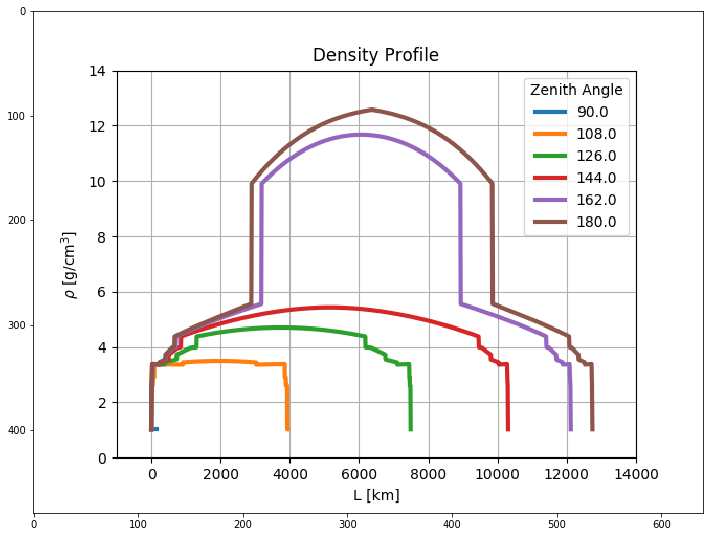

In [14]:
from PIL import Image
picture = Image.open("prem_profile.png")
plt.figure(figsize = (12,18))
plt.imshow(picture)

## Results

This section of code for the machine learning was borked! Reference these results below!!

Although my package though working was a dud in the area of yielding visible machine learning results as I originally intended, there is some redemption in my plot that could simulate the density of the Earth as a function of grams per cubic centimeter with respect to the tunneling length from the IceCube observatory (assumed South Pole) to the other side of the Earth based on zenith angle. 

Based on prior and future studies (this code was based on a 1981 paper), this confirms that the density of the Earth around the outer core is approximately 12.5 grams per cubic centimeter. The density of the outer core of the Earth is between 10 g/cm3 and 12.3 g/cm3 according to traditional studies, so using neutrino tomography does in this case bode well as a valid method for estimating the composition of the Earth.



## Discussion and Conclusion

* Though my machine learning package did not end up successfully reading in neutrino events from detectors as I would have desires due to some incompatibility issues between my package and the compiled TFiles (and with time constraints, I was not able to handle writing the package and creating my own datasets of thousands of images), I did have a package that built successfully on my home machine with success having others test out the capacity of the package to install just like any module would in Python. In the process, I did learn quite a bit about implementing Pythonic software engineering practices.

* Baring time, I would have loved the capacity of working out the kinks within my package to get my machine learning algorithm working and to determine the level of accuracy it would have been capable of exhibiting with regards to learning.

* Utilizing neutrinos as a means to analyzing the composition of the Earth is a valid method for determining the core composition of the Earth. This also provides a valid means of demonstrating and reiterating that the Earth is not flat, not hollow, but rather it is a spheroid with most of its density concentrated around its core.

### References

Aguilar-Arevalo, A. A., et al. “Significant Excess of Electronlike Events in the MiniBooNE Short-Baseline Neutrino Experiment.” Physical Review Letters, vol. 121, no. 22, 2018, doi:10.1103/physrevlett.121.221801.

[<sup>23</sup>](#fn23)Batra, Dhruv. Interactive Co-Segmentation of Objects in Image Collections. Springer, 2012.


[<sup>25</sup>](#fn25)BISHOP, CHRISTOPHER M. PATTERN RECOGNITION AND MACHINE LEARNING. SPRINGER-VERLAG NEW YORK, 2016.

[<sup>27</sup>](#fn27)Branch, Glenn. “Yes, Flat-Earthers Really Do Exist.” Scientific American Blog Network, Scientific American, 24 Oct. 2018, blogs.scientificamerican.com/observations/yes-flat-earthers-really-do-exist/.

[<sup>2</sup>](#fn2), [<sup>3</sup>](#fn3)Breeding Business. “How Many Dog Breeds Are There? - AKC, KC & FCI Figures.” Breeding Business, 19 Nov. 2018, breedingbusiness.com/how-many-dog-breeds-are-there/.

“But What Is a Neural Network? | Deep Learning, Chapter 1.” YouTube, 3Blue1Brown, 5 Oct. 2017, www.youtube.com/watch?v=aircAruvnKk.

[<sup>9</sup>](#fn9), [<sup>12</sup>](#fn12)Close, Frank E. Neutrino. Oxford University Press, 2012.


[<sup>6</sup>](#fn6), [<sup>7</sup>](#fn7) Davies, E. R. Machine Vision: Theory, Algorithms, Practicalities. 3rd ed., Elsevier, 2008.

[<sup>19</sup>](#fn19)“Deep Underground Neutrino Experiment.” Deep Underground Neutrino Experiment, Fermi National Accelerator Laboratory, 2019, www.dunescience.org/.

[<sup>15</sup>](#fn15), Drewes, Marco. “The Phenomenology Of Right Handed Neutrinos.” International Journal of Modern Physics E, vol. 22, no. 08, 2013, p. 1330019., doi:10.1142/s0218301313300191.

[<sup>29</sup>](#fn28)Dziewonski, A M, and D L Anderson. “Preliminary Reference Earth Model (PREM) (Inactive).” Preliminary Reference Earth Model (PREM), ds.iris.edu/spud/earthmodel/9991844.

[<sup>18</sup>](#fn18)“EXO: Enrinched Xenon Observatory - Neutrinoless Double Beta Decay.” EXO: Enriched Xenon Observatory - Neutrinoless Double Beta Decay, https://www-project.slac.stanford.edu/exo/

[<sup>1</sup>](#fn1) “How Machines Learn.” YouTube, CGP Grey, 18 Dec. 2017, www.youtube.com/watch?v=R9OHn5ZF4Uo.


[<sup>13</sup>](#fn13) , Jayawardhana, Ray. Neutrino Hunters: The Thrilling Chase For A Ghostly Particle to Unlock the Secrets of the Universe. HarperCollins, 2014.

[<sup>14</sup>](#fn14) Karagiorgi, G., et al. “Erratum: LeptonicCPviolation Studies at MiniBooNE in the (3+2) Sterile Neutrino Oscillation Hypothesis [Phys. Rev. D75, 013011 (2007)].” Physical Review D, vol. 80, no. 9, 2009, doi:10.1103/physrevd.80.099902.

[<sup>21</sup>](#fn21)“Kazuhiro Terao.” Kazuhiro Terao's Profile | Stanford Profiles, Stanford University, profiles.stanford.edu/kazuhiro-terao.

[<sup>4</sup>](#fn4) Mignotte, M. “Segmentation by Fusion of Histogram-Based $K$-Means Clusters in Different Color Spaces.” IEEE Transactions on Image Processing, vol. 17, no. 5, June 2008, pp. 780–787., doi:10.1109/tip.2008.920761.

[<sup>8</sup>](#fn8), [<sup>24</sup>](#fn24)  Nielsen, Michael A. “Neural Networks and Deep Learning.” Neural Networks and Deep Learning, Determination Press, 1 Jan. 2015, neuralnetworksanddeeplearning.com/chap1.html.

[<sup>16</sup>](#fn16)“NOvA Collaboration.” NOvA, Fermi National Accelerator Laboratory, 2019, novaexperiment.fnal.gov/collaboration/.

[<sup>10</sup>](#fn10), [<sup>11</sup>](#fn11)“Particle Central - Neutrinos.” Neutrinos, www.particlecentral.com/neutrinos_page.html.

[<sup>28</sup>](#fn28)Particle Data Group. “Particle Data Group - 2019 Review.” Particle Data Group - 2019 Review, pdg.lbl.gov/.


[<sup>5</sup>](#fn5), [<sup>23</sup>](#fn23) Riesenhuber, Maximilian, and Tomaso Poggio. “Hierarchical Models of Object Recognition in Cortex.” Nature Neuroscience, vol. 2, no. 11, 1999, pp. 1019–1025., doi:10.1038/14819.

Surma, Greg. “Image Classifier - Cats vs Dogs.” Medium, Towards Data Science, 17 Jan. 2019, towardsdatascience.com/image-classifier-cats-vs-dogs-with-convolutional-neural-networks-cnns-and-google-colabs-4e9af21ae7a8.

[<sup>17</sup>](#fn17)“The T2K Collaboration.” t2k, 2019, t2k-experiment.org/t2k/collaboration/.

[<sup>20</sup>](#fn20)Tomalak, et al. “Theory of Elastic Neutrino-Electron Scattering.” ArXiv.org, 8 July 2019, arxiv.org/abs/1907.03379.

[<sup>20</sup>](#fn20)Zepeng, Li. “Measurement of Tau Neutrino Appearance and Charged-Current Tau Neutrino Cross Section with Atmospheric Neutrinos in Super-Kamiokande.” Measurement of Tau Neutrino Appearance and Charged-Current Tau Neutrino Cross Section with Atmospheric Neutrinos in Super-Kamiokande, Duke University, 1 Jan. 2017, dukespace.lib.duke.edu/dspace/handle/10161/14486.